In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir(r"C:\Users\sakth\Downloads\Summary of Weather.csv"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.


['operations.csv', 'Summary of Weather.csv', 'Weather Station Locations.csv']


In [15]:
# bombing data
aerial = pd.read_csv("operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("Summary of Weather.csv")

In [16]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [17]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Target 

In [18]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [19]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


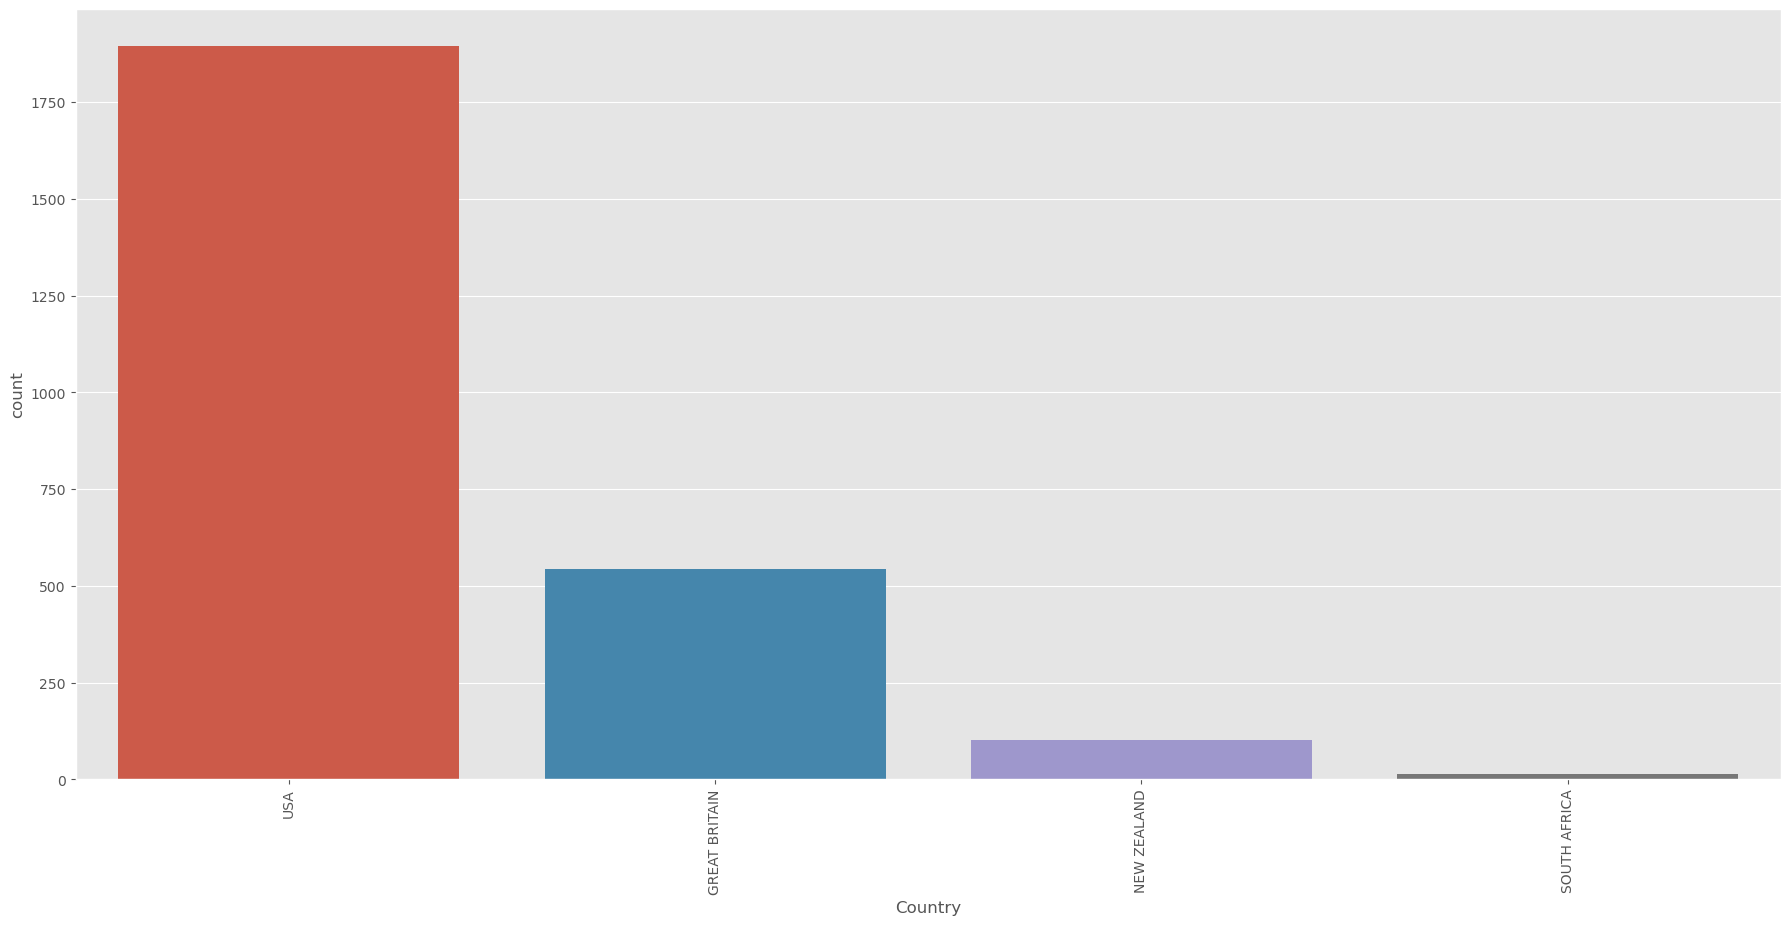

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'aerial' is your DataFrame containing aerial data
# If not, replace 'aerial' with the appropriate DataFrame name
plt.figure(figsize=(22, 10))
sns.countplot(data=aerial, x='Country', order=aerial['Country'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64

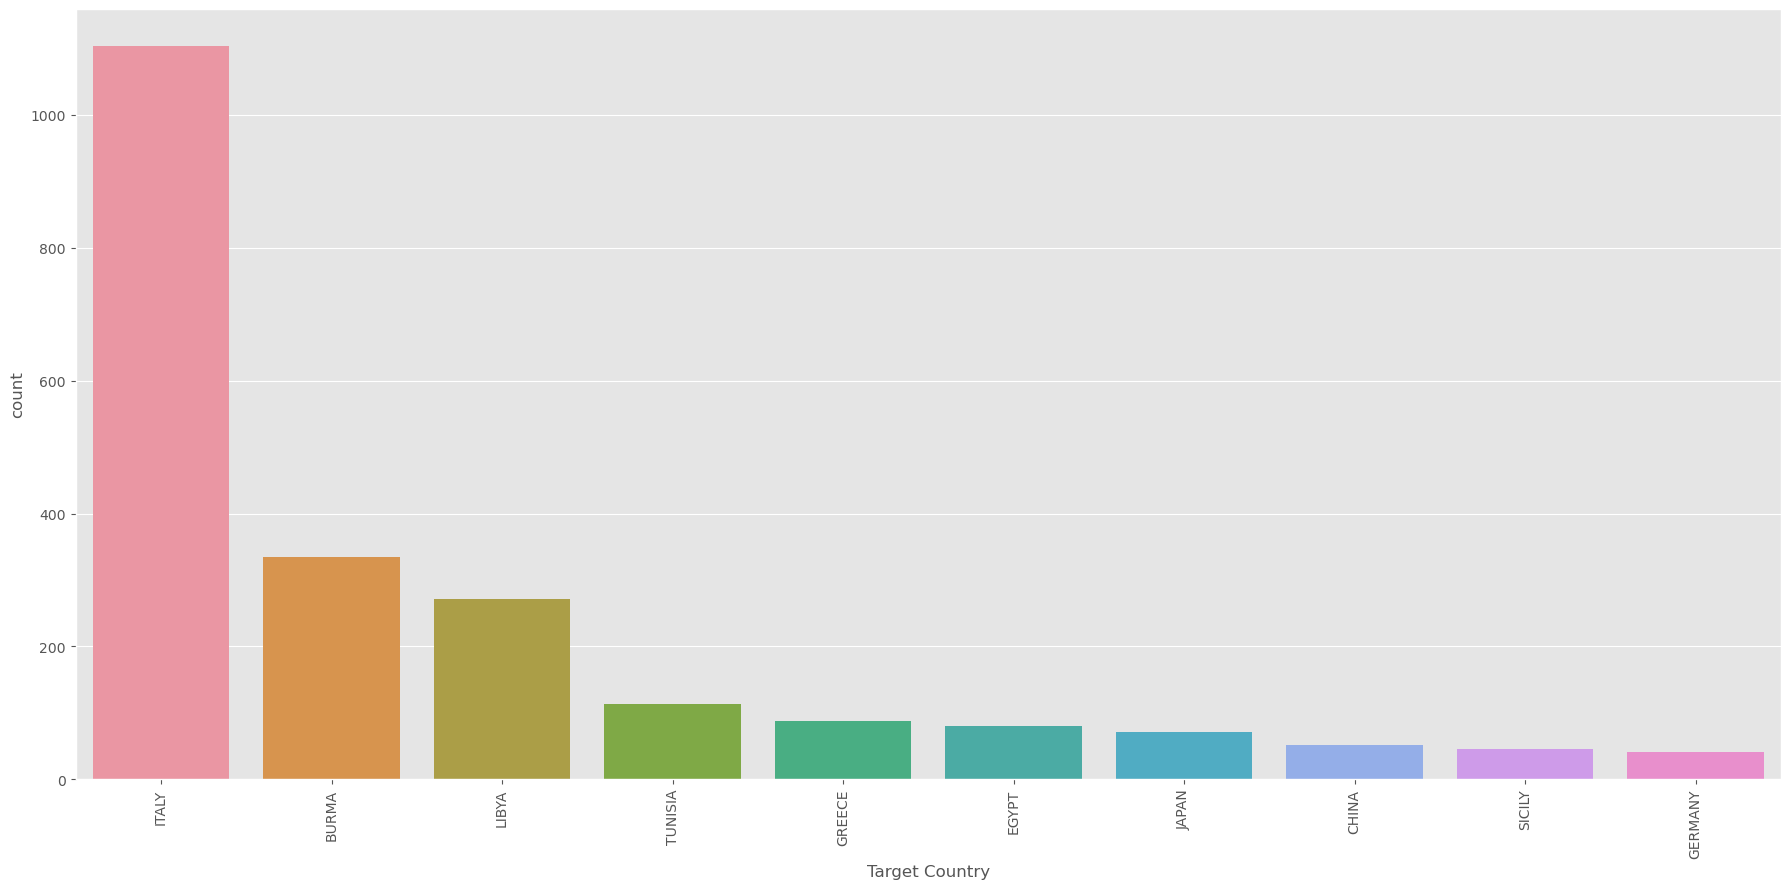

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'aerial' is your DataFrame containing aerial data
# If not, replace 'aerial' with the appropriate DataFrame name
plt.figure(figsize=(22, 10))
sns.countplot(data=aerial, x='Target Country', order=aerial['Target Country'].value_counts().index[:10])
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64

In [26]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Aircraft Series
A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: count, dtype: int64


In [27]:
aerial.head()

Mission Date Theater of Operations Country Air Force Aircraft Series  \
0    8/15/1943                   MTO     USA     12 AF             A36   
2    8/15/1943                   MTO     USA     12 AF             A36   
3    8/15/1943                   MTO     USA     12 AF             A36   
8    8/15/1943                   MTO     USA     12 AF             A36   
9    8/15/1943                   MTO     USA     12 AF             A36   

  Callsign          Takeoff Base Takeoff Location Takeoff Latitude  \
0      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
2      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
3      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
8      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
9      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   

   Takeoff Longitude Target Country  Target City Target Type  \
0          14.321464          ITALY    SPADAFORA         NaN   
2          14.321464          ITALY      COSENZA         NaN   
3          14.321464          ITALY  GIOJA TAURO         NaN   
8          14.321464          ITALY       SCILLA         NaN   
9          14.321464          ITALY  GIOJA TAURO         NaN   

                Target Industry Target Priority  Target Latitude  \
0                           NaN             NaN            38.22   
2                           NaN             NaN            39.27   
3                           NaN             NaN            38.43   
8                           NaN             NaN            38.23   
9  ARMAMENT AND ORDNANCE PLANTS             NaN            38.43   

   Target Longitude  
0             15.37  
2             16.25  
3             15.90  
8             15.72  
9             15.90

In [30]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Assuming 'aerial' is your DataFrame containing aerial data
# If not, replace 'aerial' with the appropriate DataFrame name

# Create a new column 'color'
aerial["color"] = ""

# Assign colors based on conditions
aerial.loc[aerial.Country == "USA", "color"] = "rgb(0,116,217)"
aerial.loc[aerial.Country == "GREAT BRITAIN", "color"] = "rgb(255,65,54)"
aerial.loc[aerial.Country == "NEW ZEALAND", "color"] = "rgb(133,20,75)"
aerial.loc[aerial.Country == "SOUTH AFRICA", "color"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon=aerial['Takeoff Longitude'],
    lat=aerial['Takeoff Latitude'],
    hoverinfo='text',
    text="Country: " + aerial.Country + " Takeoff Location: " + aerial["Takeoff Location"] + " Takeoff Base: " +
         aerial['Takeoff Base'],
    mode='markers',
    marker=dict(
        sizemode='area',
        sizeref=1,
        size=10,
        line=dict(width=1, color="white"),
        color=aerial["color"],
        opacity=0.7),
)]

layout = dict(
    title='Countries Take Off Bases',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        # Remove the 'projection' property from here
        landcolor='rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



In [38]:
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd

# Assuming 'aerial' DataFrame is defined

# Define airport markers
airports = [dict(
    type='scattergeo',
    lon=aerial['Takeoff Longitude'],
    lat=aerial['Takeoff Latitude'],
    hoverinfo='text',
    text="Country: " + aerial['Country'] + " Takeoff Location: " + aerial["Takeoff Location"] + " Takeoff Base: " + aerial['Takeoff Base'],
    mode='markers',
    marker=dict(
        size=5,
        color=aerial["color"],
        line=dict(
            width=1,
            color="white"
        )
    ))]

# Define target markers
targets = [dict(
    type='scattergeo',
    lon=aerial['Target Longitude'],
    lat=aerial['Target Latitude'],
    hoverinfo='text',
    text="Target Country: " + aerial["Target Country"] + " Target City: " + aerial["Target City"],
    mode='markers',
    marker=dict(
        size=1,
        color="red",
        line=dict(
            width=0.5,
            color="red"
        )
    ))]

# Define flight paths
flight_paths = []
for i in range(len(aerial['Target Longitude'])):
    flight_paths.append(
        dict(
            type='scattergeo',
            lon=[aerial.iloc[i, 9], aerial.iloc[i, 16]],
            lat=[aerial.iloc[i, 8], aerial.iloc[i, 15]],
            mode='lines',
            line=dict(
                width=0.7,
                color='black',
            ),
            opacity=0.6,
        )
    )

# Define layout
layout = dict(
    title='Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        projection=dict(type='mercator'),  # Corrected projection type
        landcolor='rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"
    )
)

# Create figure
fig = dict(data=flight_paths + airports + targets, layout=layout)

# Plot figure
iplot(fig)


As you ca see from bombing paths, most of the bombing attack is done in Mediterranean theater of operations. Theater of Operations:

ETO: European Theater of Operations
PTO: Pasific Theater of Operations
MTO: Mediterranean Theater of Operations
CBI: China-Burma-India Theater of Operations
EAST AFRICA: East Africa Theater of Operations

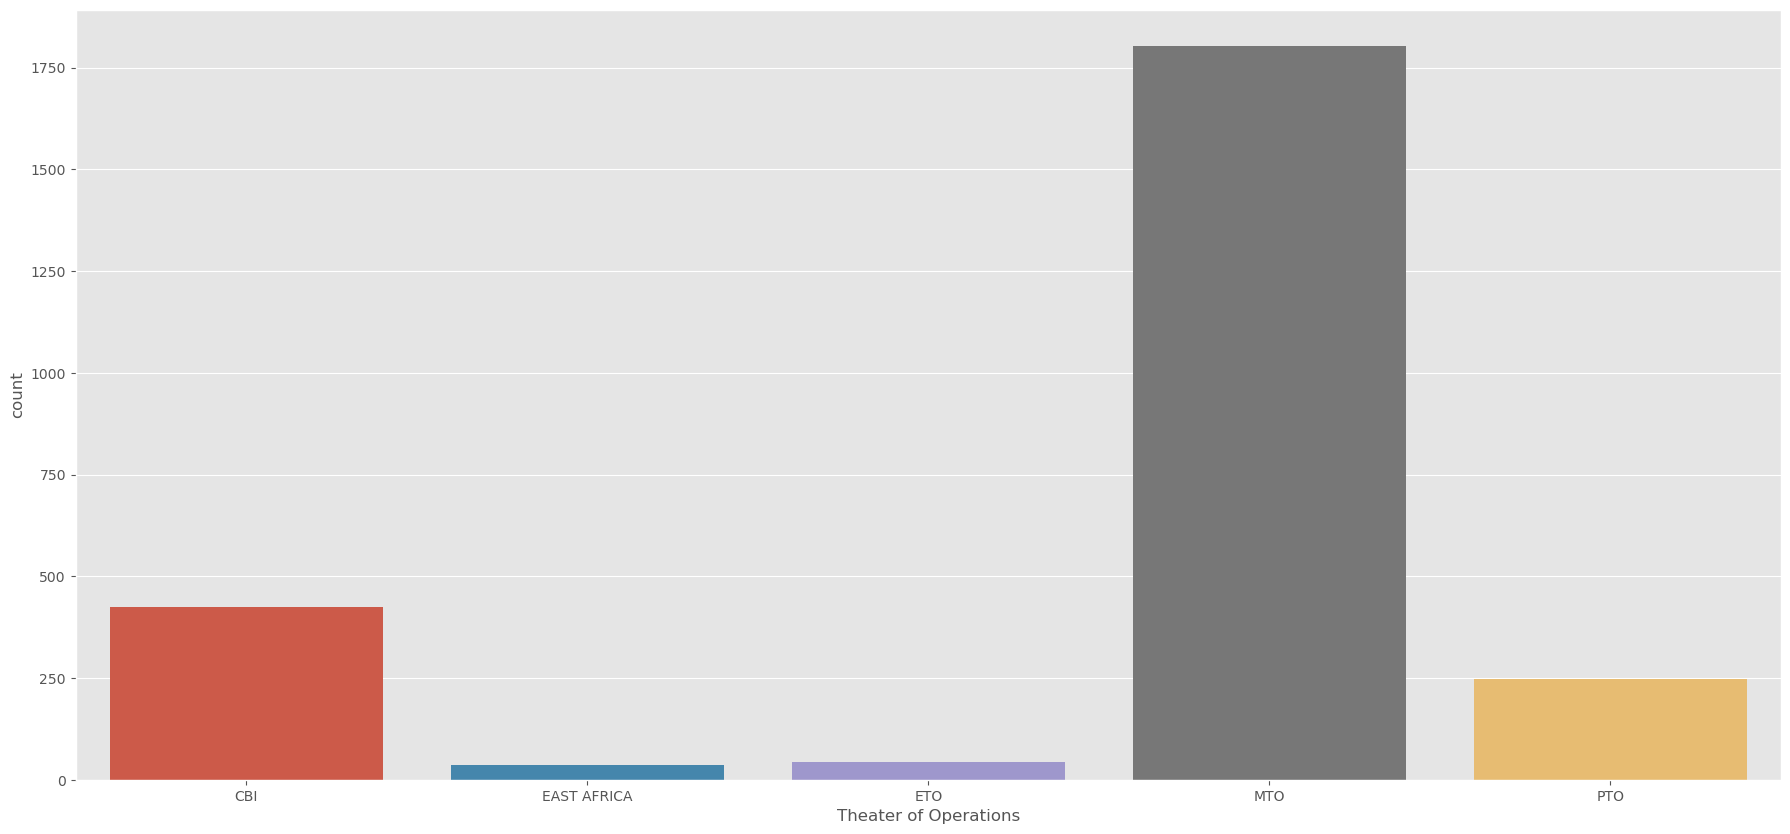

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Theater of Operations' column to categorical data type
aerial['Theater of Operations'] = aerial['Theater of Operations'].astype('category')

# Plot countplot
plt.figure(figsize=(22,10))
sns.countplot(data=aerial, x='Theater of Operations')
plt.show()


In [42]:
import plotly.graph_objs as go

# Assuming weather_station_location is a DataFrame containing longitude, latitude, name, and country information

# Define data trace
data = [
    {
        'type': 'scattergeo',
        'lon': weather_station_location['Longitude'],
        'lat': weather_station_location['Latitude'],
        'hoverinfo': 'text',
        'text': "Name: " + weather_station_location['NAME'] + " Country: " + weather_station_location["STATE/COUNTRY ID"],
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
            'sizeref': 1,
            'size': 8,
            'line': {'width': 1, 'color': 'white'},
            'color': 'blue',
            'opacity': 0.7
        },
    }
]

# Define layout
layout = {
    'title': 'Weather Station Locations',
    'hovermode': 'closest',
    'geo': {
        'showframe': False,
        'showland': True,
        'showcoastlines': True,
        'showcountries': True,
        'countrywidth': 1,
        'projection': {'type': 'mercator'},  # Use 'mercator' instead of 'Mercator'
        'landcolor': 'rgb(217, 217, 217)',
        'subunitwidth': 1,
        'showlakes': True,
        'lakecolor': 'rgb(255, 255, 255)',
        'countrycolor': 'rgb(5, 5, 5)'
    }
}

# Create figure
fig = go.Figure(data=data, layout=layout)

# Display figure
iplot(fig)


Lets focus USA and BURMA war
In this war USA bomb BURMA( KATHA city) from 1942 to 1945.
The closest weather station to this war is BINDUKURI and it has temperature record from 1943 to 1945.
Now lets visualize this situation. But before visualization, we need to make date features date time object.

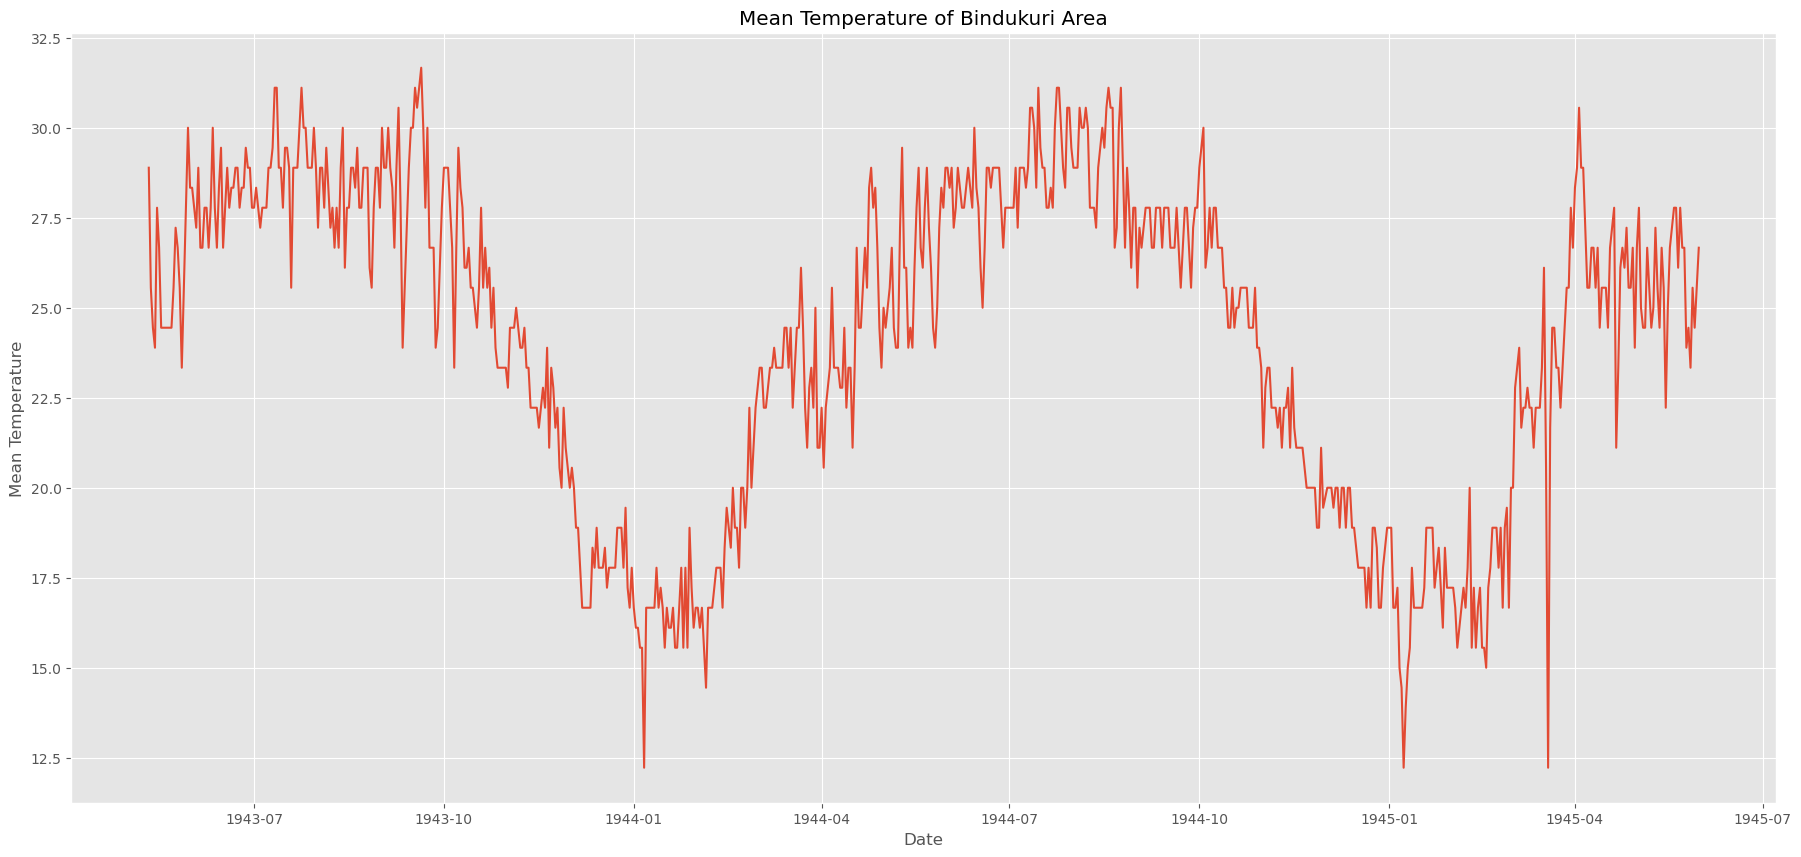

In [43]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [46]:
import pandas as pd

# Read the dataset
aerial = pd.read_csv("operations.csv")

# Extract year and month from the 'Mission Date' column
aerial["year"] = [each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [each.split("/")[0] for each in aerial["Mission Date"]]

# Filter the data for the desired time period
aerial = aerial[aerial["year"] >= "1943"]
aerial = aerial[aerial["month"] >= "8"]

# Convert 'Mission Date' column to datetime format
aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

# Define variables for attack, target, and city
attack = "USA"
target = "BURMA"
city = "KATHA"

# Filter the data based on attack country, target country, and target city
aerial_war = aerial[(aerial["Country"] == attack) &
                    (aerial["Target Country"] == target) &
                    (aerial["Target City"] == city)]


In [47]:
# I get very tired while writing this part, so sorry for this dummy code But I guess you got the idea
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

Green line is mean temperature that is measured in Bindukuri.
Blue markers are bombing dates and bombing date temperature.
As it can be seen from plot, USA bomb at high temperatures.
The question is that can we predict future weather and according to this prediction can we know whether bombing will be done or not.
In order to answer this question lets first start with time series prediction.

Time Series Prediction with ARIMA

ARIMA : AutoRegressive Integrated Moving Average

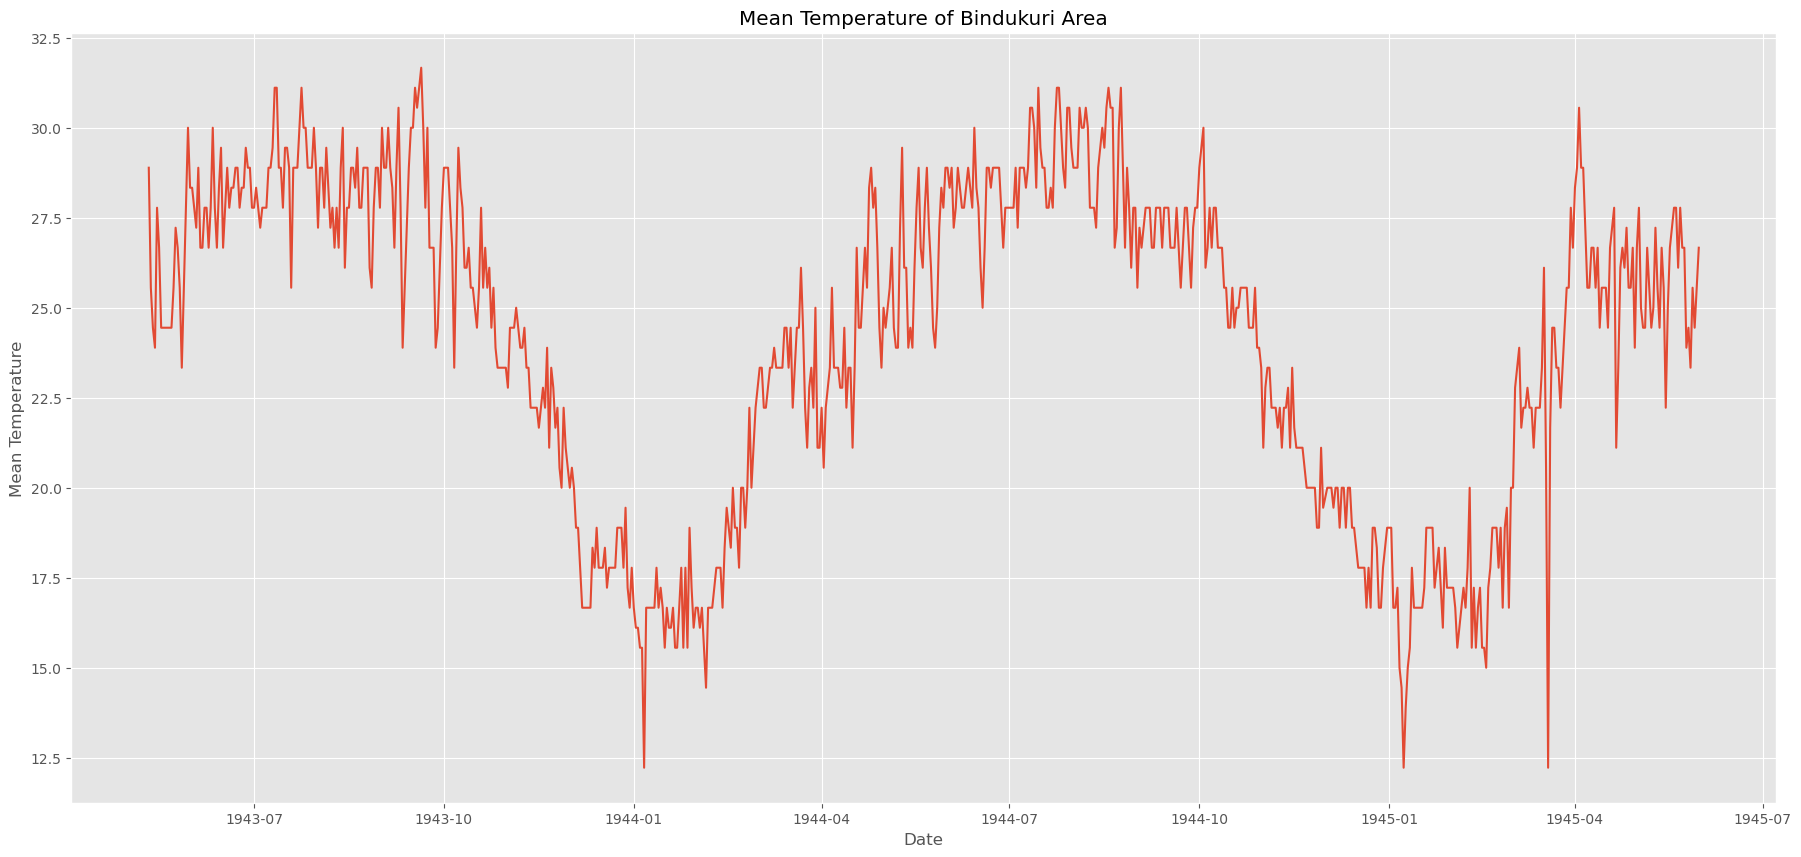

In [48]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

As you can see from plot above, our time series has seasonal variation. In summer, mean temperature is higher and in winter mean temperature is lower for each year.
Now lets check stationary of time series. We can check stationarity using the following methods:
Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.

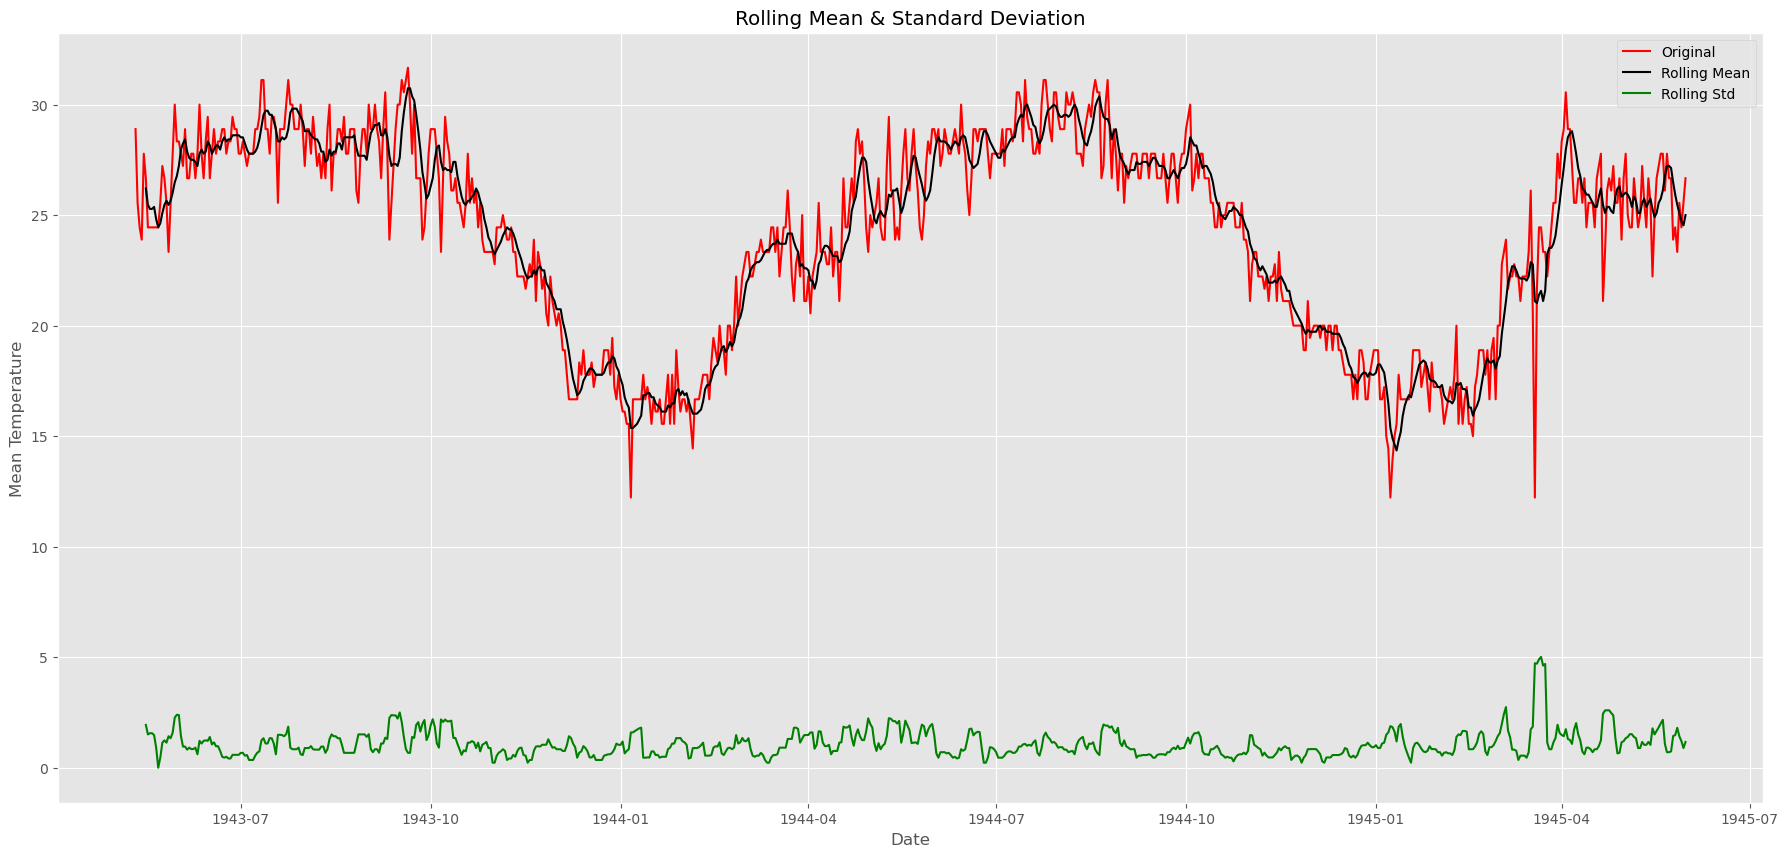

Test statistic:  -1.4095966745887756
p-value:  0.5776668028526357
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# adfuller library 
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ', result[0])
    print('p-value: ', result[1])
    print('Critical Values:', result[4])

# check_mean_std
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std), and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)


Test statistic:  -1.409596674588769
p-value:  0.5776668028526388
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}
Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
Second one is constant variance. It looks like constant. (yes stationary)
Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (no stationary)
As a result, we sure that our time series is not stationary.
Lets make time series stationary at the next part.

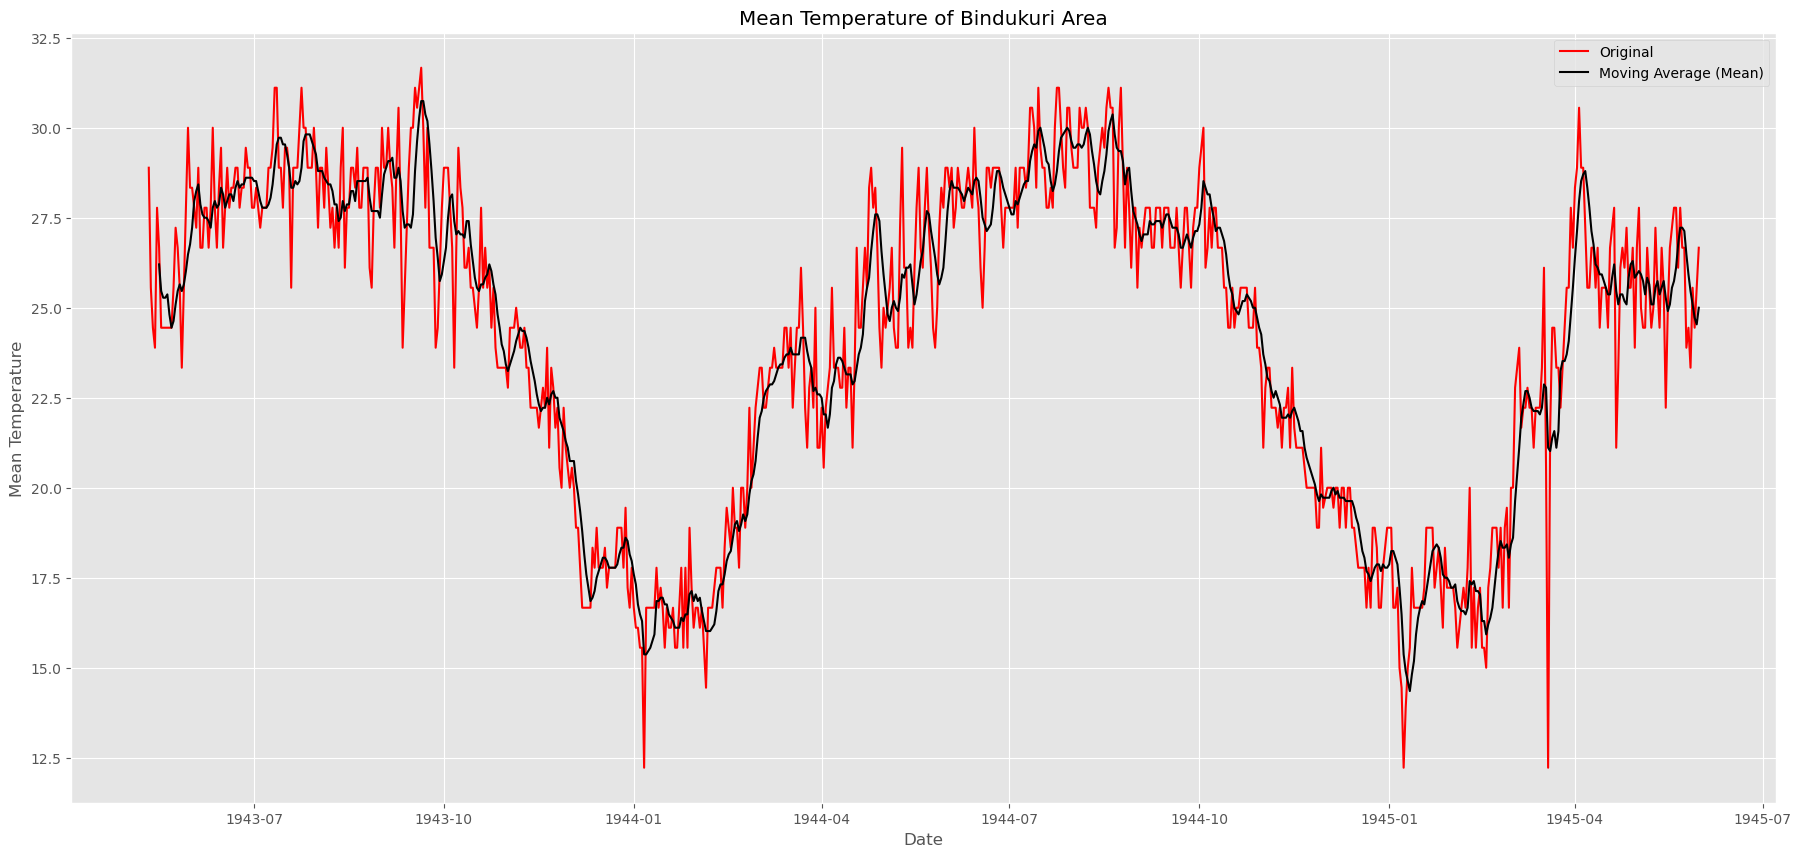

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Moving average method
window_size = 6
moving_avg = ts.rolling(window=window_size).mean()

plt.figure(figsize=(22,10))
plt.plot(ts, color="red", label="Original")
plt.plot(moving_avg, color='black', label="Moving Average (Mean)")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()


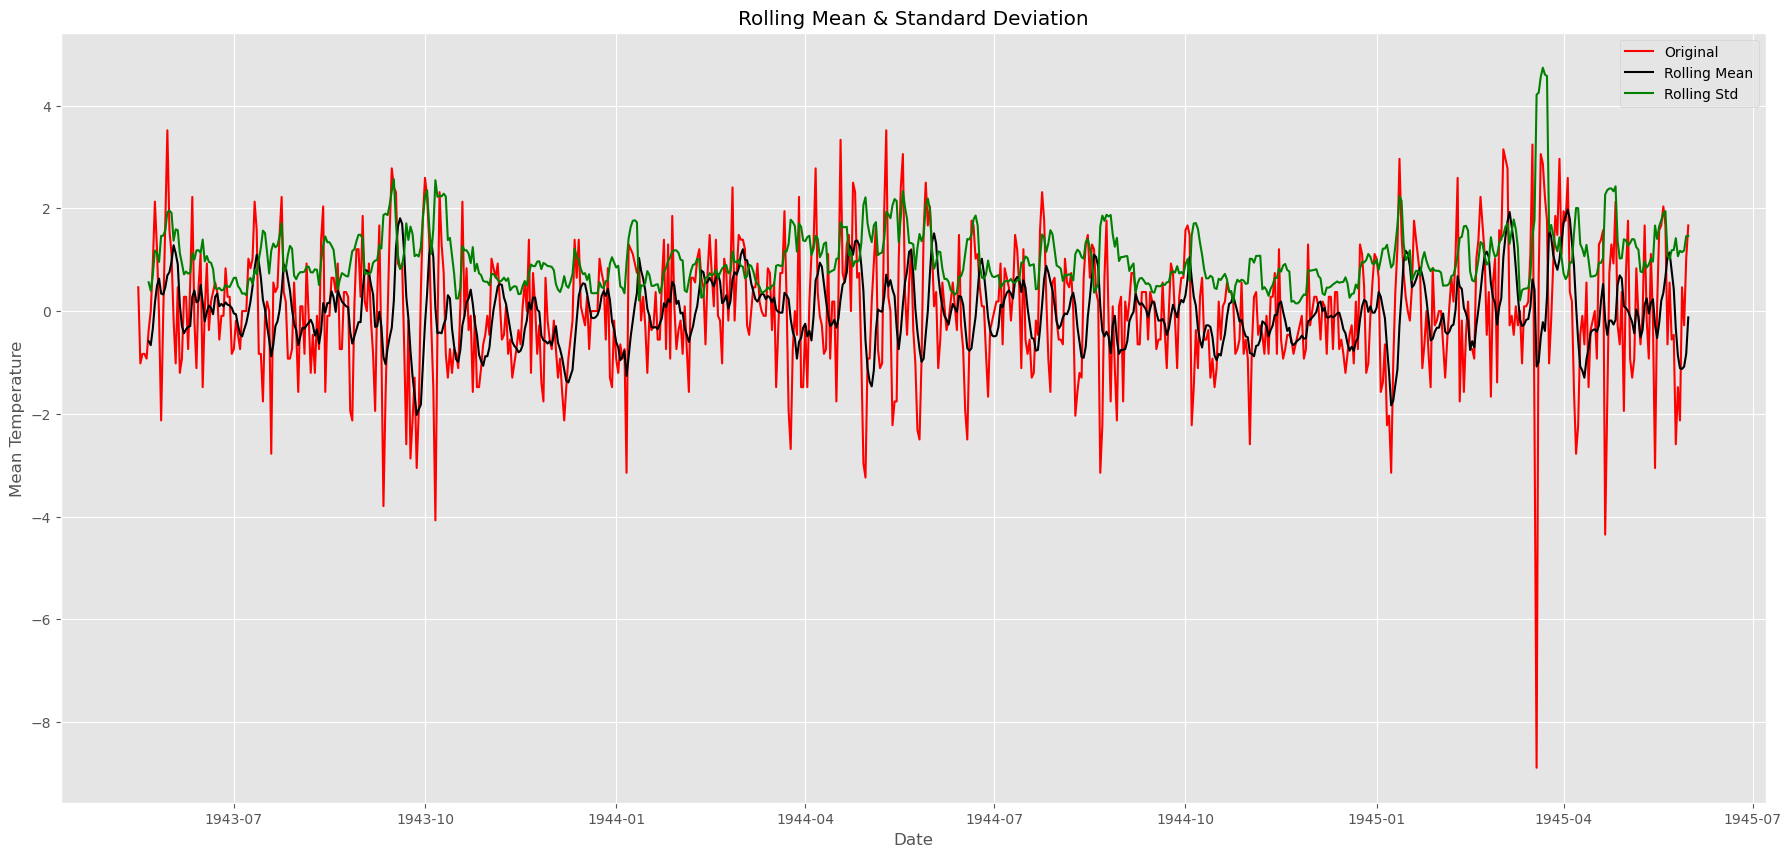

Test statistic:  -11.138514335138499
p-value:  3.150868563164177e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [53]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)


Test statistic:  -11.138514335138474
p-value:  3.150868563164652e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}
Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
Second one is constant variance. It looks like constant. (yes stationary)
The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)
We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.
Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

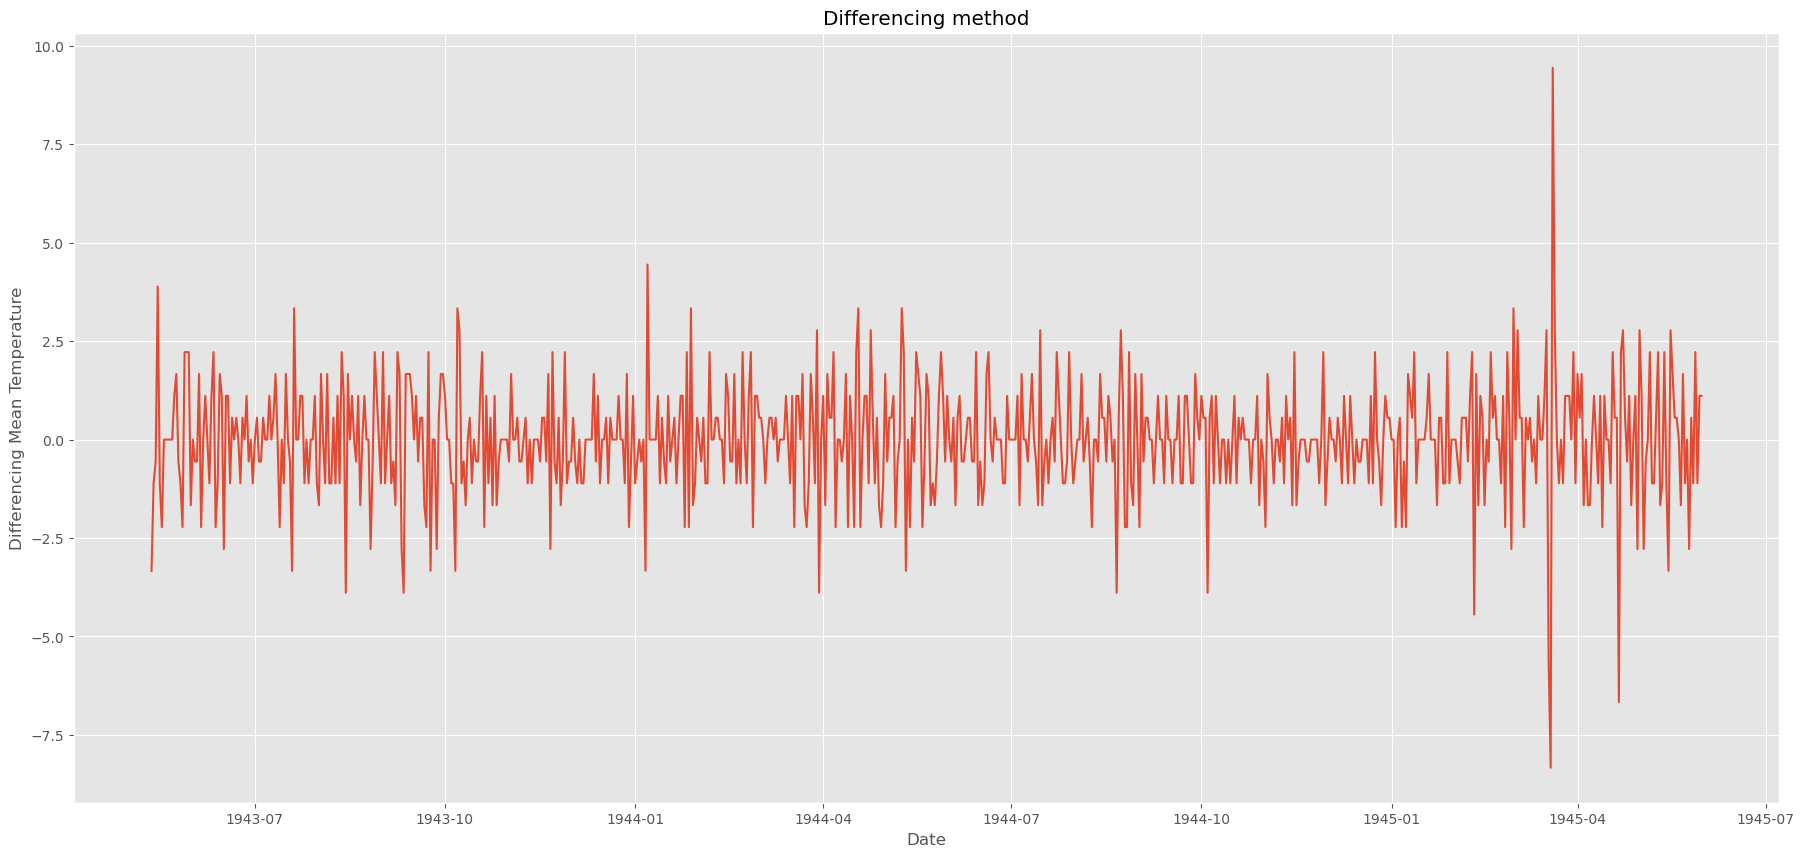

In [54]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

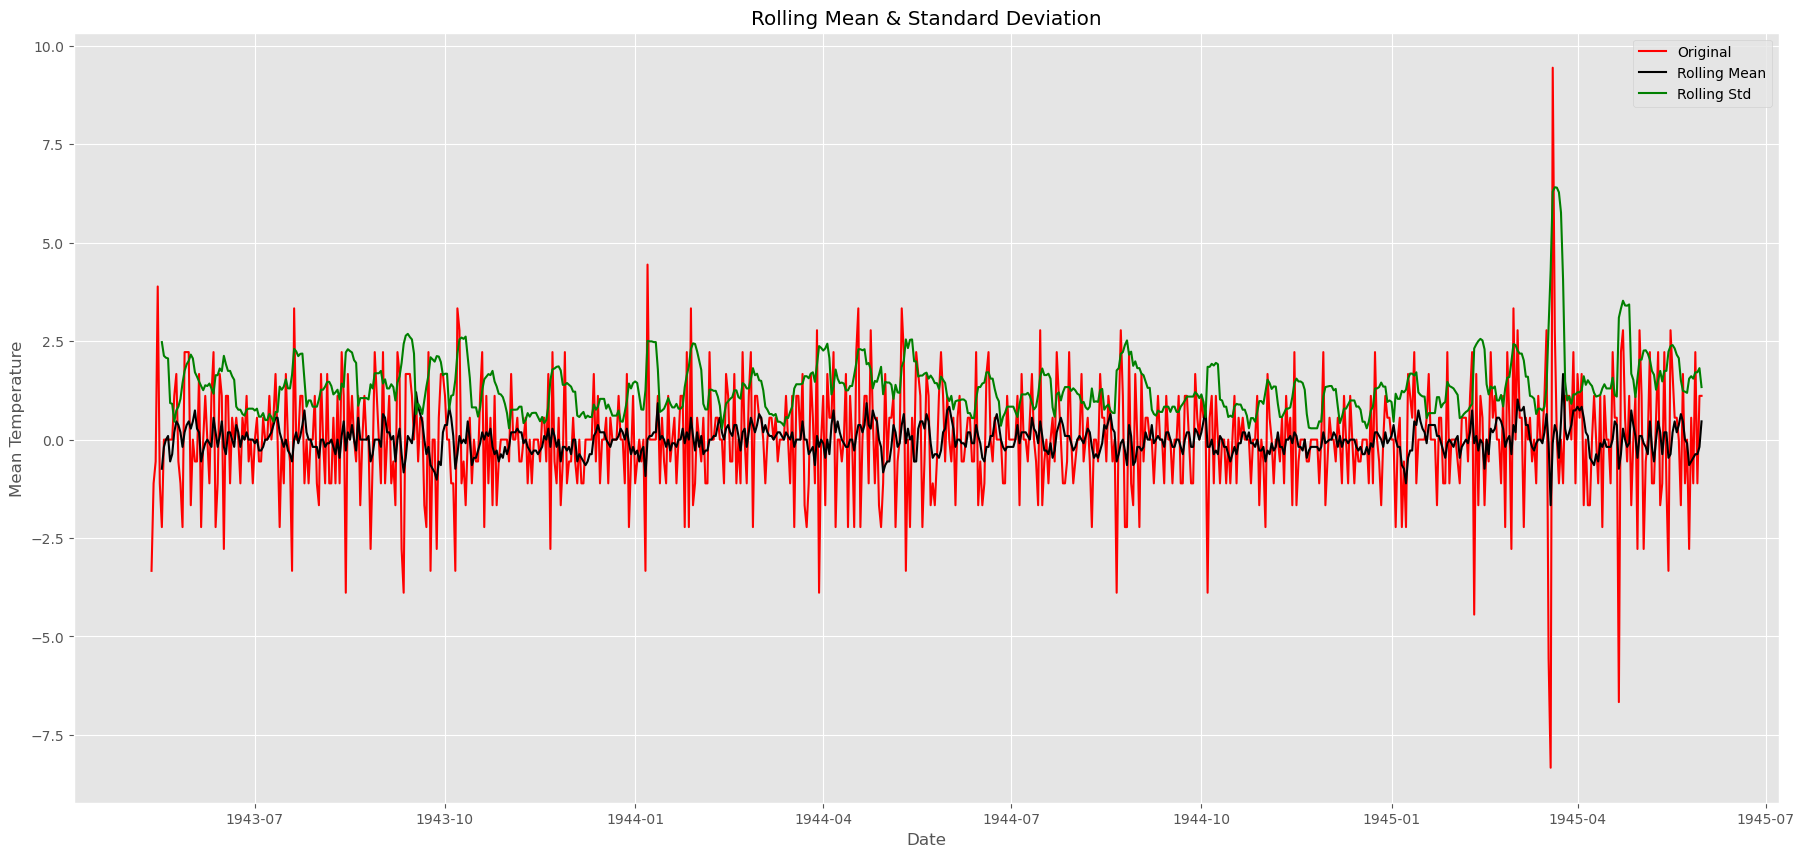

Test statistic:  -11.67895557510536
p-value:  1.7602075693560356e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [55]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)


Forecasting a Time Series

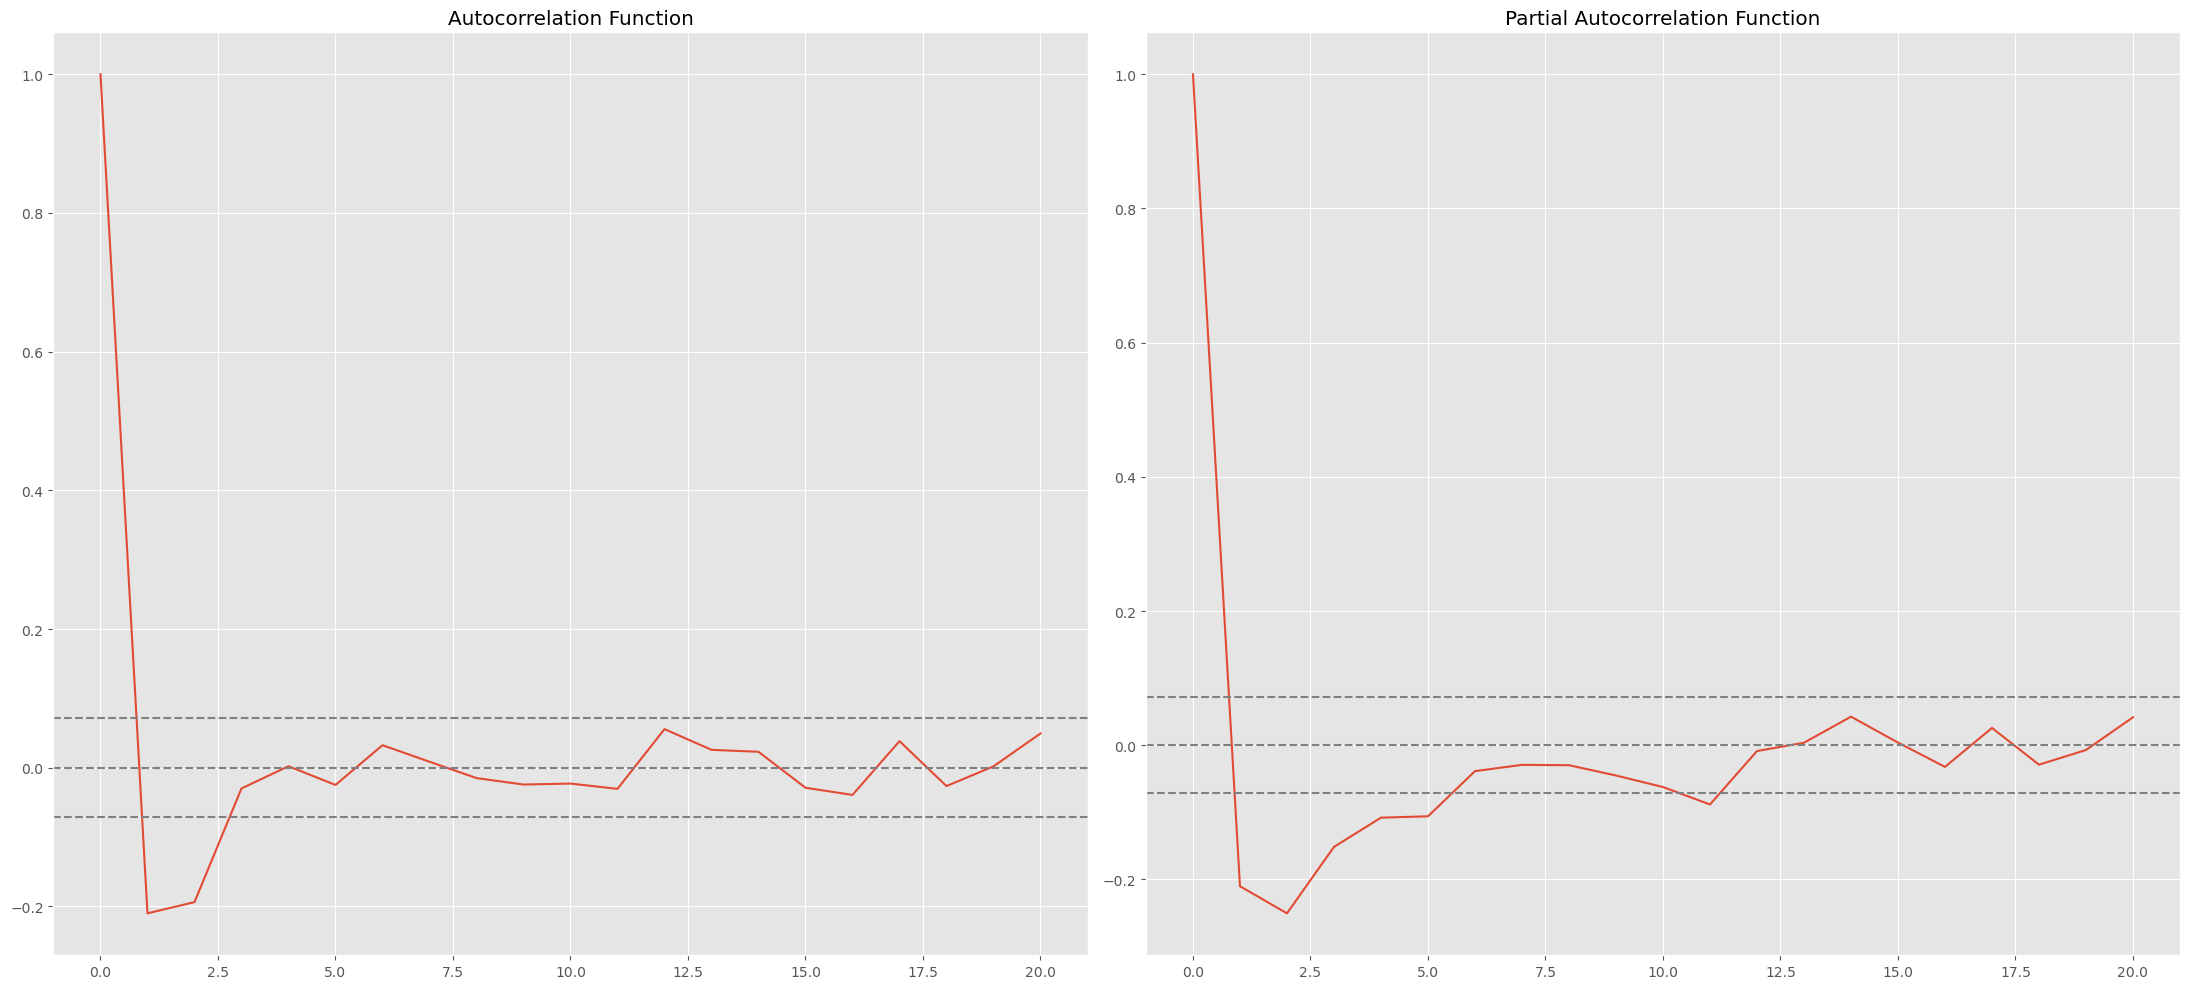

In [56]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.
Now lets use (1,0,1) as parameters of ARIMA models and predict
ARIMA: from statsmodels libarary
datetime: we will use it start and end indexes of predict method

c:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



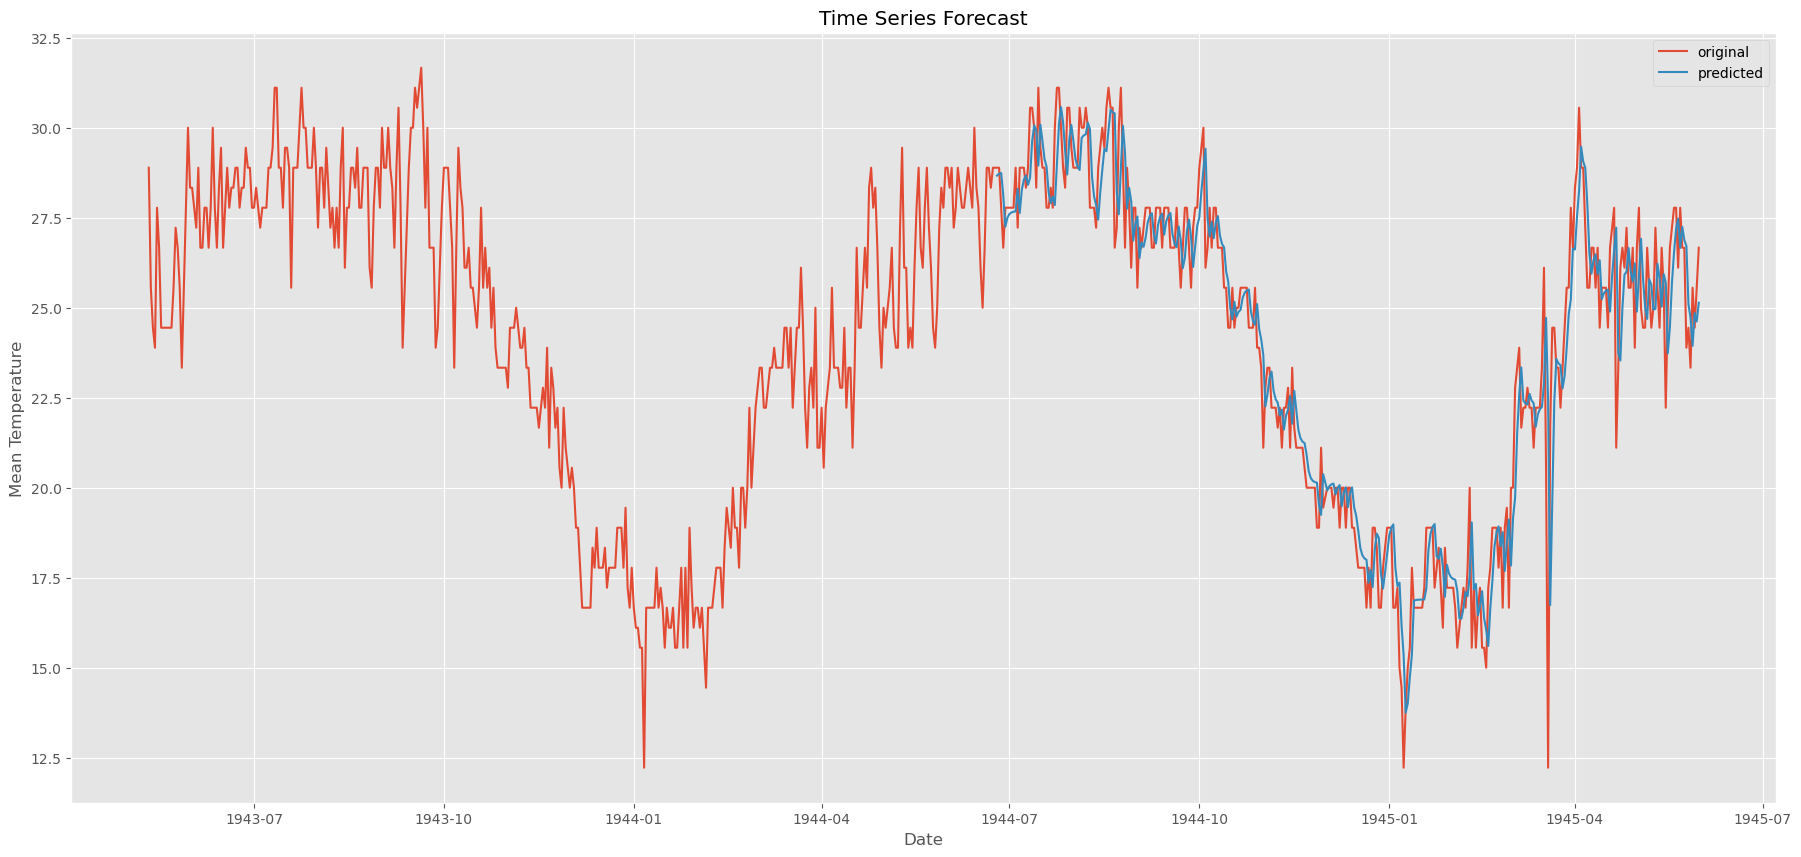

In [59]:
# ARIMA LIBRARY
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = pd.Timestamp(1944, 6, 25)
end_index = pd.Timestamp(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label="original")
plt.plot(forecast, label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()


c:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Mean Squared Error: 1.862581028689385


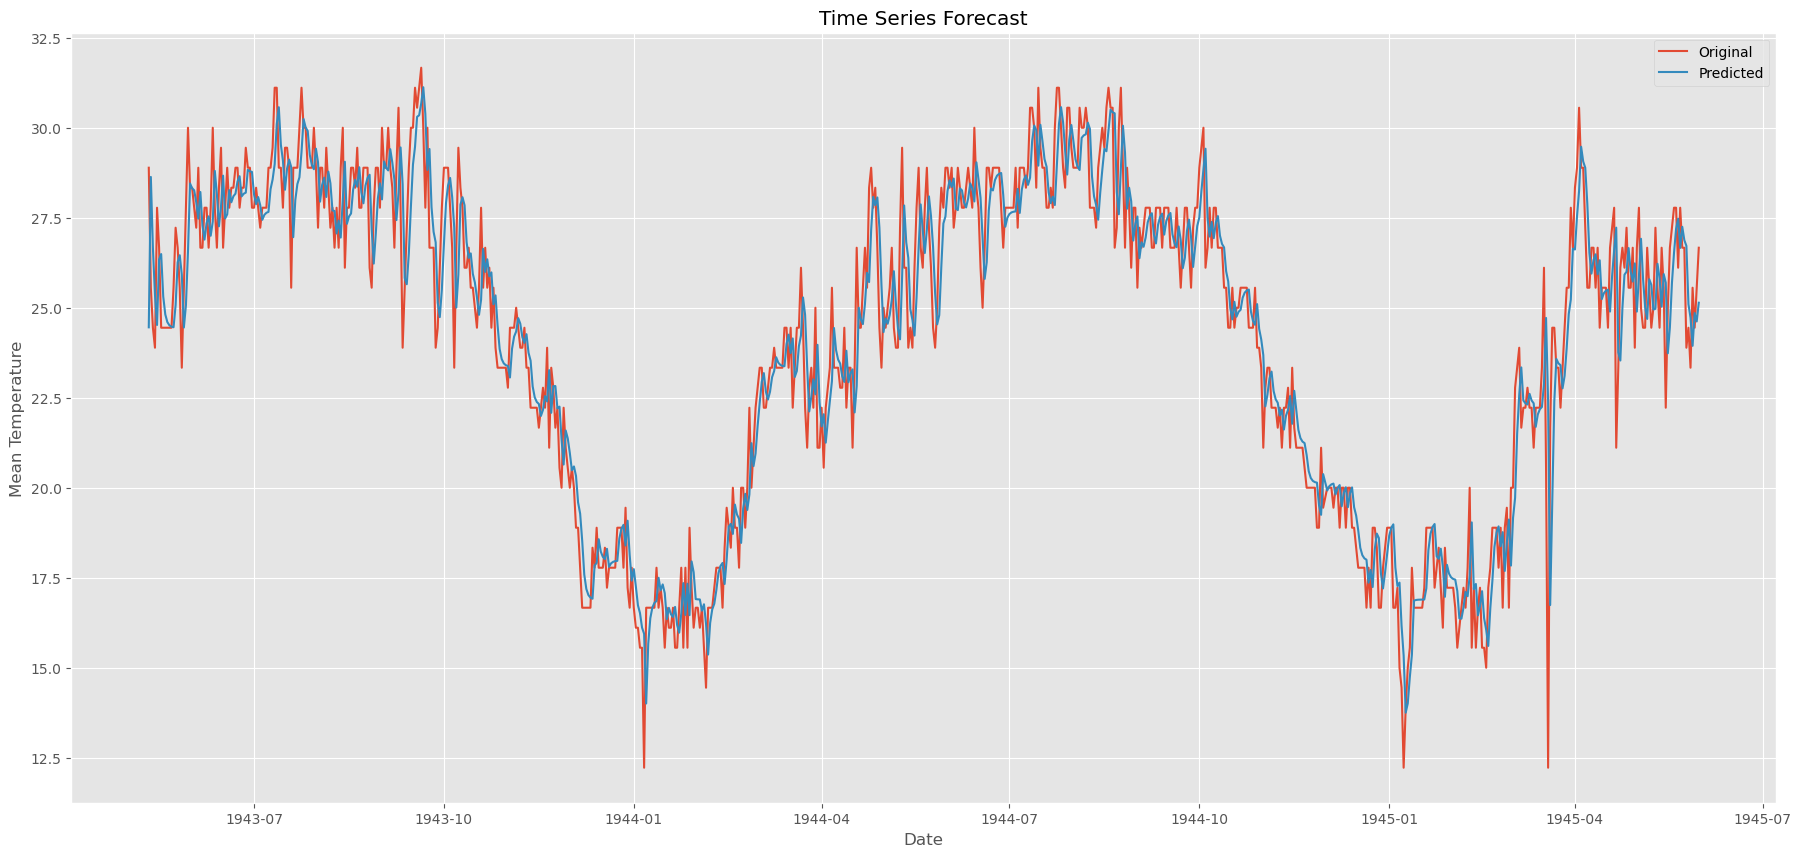

In [65]:
# Import libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.predict()

# Calculate mean squared error
error = mean_squared_error(ts, forecast)
print("Mean Squared Error:", error)

# Visualization
plt.figure(figsize=(22, 10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label="Original")
plt.plot(forecast, label="Predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')
plt.show()
